<a href="https://colab.research.google.com/github/uol-mediaprocessing-202021/medienverarbeitung-b-color-and-tone-correction/blob/develop/grabCut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## grabCut

After the desired goal with the Canny algorithm was not achieved and the group decided not to use it any further, the group took a closer look at the grabCut algorithm. This time, the thought was that it might make more sense to separate the foreground from the background directly and not to search for the objects by pure edge detection first. 

## Description

The GrabCut algorithm is an iterative edge detection algorithm developed by Carsten Rother, Vladimir Kolmogorov and Andrew Blank. GrabCut is about separating the foreground from the background. To do this, a rectangle is placed around the foreground. Everything around the rectangle is recognized as background. Then a Gaussian Mixture Model (GMM) is used to model the foreground and background and a new pixel distribution is made to assign pixels that are still unknown to the foreground or background. Now, from the pixel distribution, a graph is created with the pixel nodes, a source node and sink nodes. The foreground pixels are source nodes and the background pixels are sink nodes. 
Next, a mincut algorithm is applied over the graph. In this process, the graph is segmented. The graph is cut into source nodes and sink nodes with the minimum cost function. 
Last but not least, a border is placed around the foreground and the background is blackened.

In [ ]:
import cv2
import math
import numpy as np
import sys
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


## Example 1
In the first example, the grabCut gave a pretty good result, as can be seen in the left image. The airplane is still outlined by a few pixels of the background, but the background was neatly separated from the foreground by blackening the background completely.

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/archive/natural_images/airplane/airplane_0006.jpg')
RGB_src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

create mask

In [ ]:
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel =  np.zeros((1,65),np.float64)
fgdModel =  np.zeros((1,65),np.float64)
x = img.shape[1]
y = img.shape[0]

rectangle: Since we dont know where the foreground objects are located in any given picture, we have to give the full resolution via the parameters x and y

In [ ]:
rect = (4,4,x,y)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2  =  np.where((mask==2)|(mask==0),0,1).astype('uint8')
img  = img*mask2[:,:,np.newaxis]

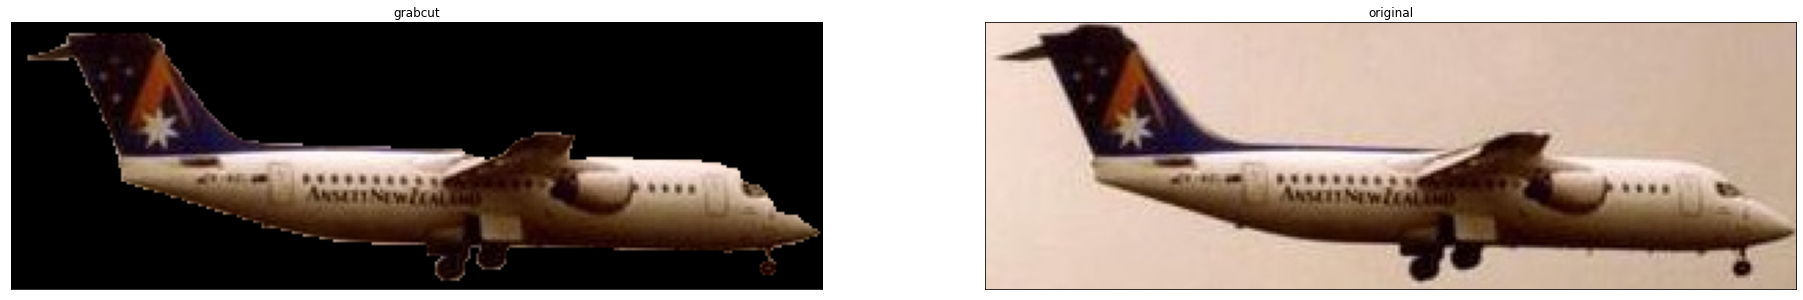

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(32,16))
plt.subplot(121),  plt.imshow(RGB_img)
plt.title("grabcut"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(RGB_src)
plt.title("original"), plt.xticks([]), plt.yticks([])

  
plt.show()

## Example 2
Beim zweiten Beispiel handelt es sich um ein Bild mit 2 Objekten, die eigentlich vom Rest des Bildes getrennt werden sollten. Hierbei bewies sich der grabCut Algorithmus als unpassend. Auch nach Anpassung der Maske, war immer noch ein Stück vom Strand, der eigentlich geschwärzt sein sollte, farblich zu sehen.

In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/landscape/00000115_(6).jpg')
RGB_src = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

create mask

In [ ]:
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel =  np.zeros((1,65),np.float64)
fgdModel =  np.zeros((1,65),np.float64)
x = img.shape[1]
y = img.shape[0]

rectangle: Since we dont know where the foreground objects are located in any given picture, we have to give the full resolution via the parameters x and y

In [ ]:
rect = (4,4,x,y)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2  =  np.where((mask==2)|(mask==0),0,1).astype('uint8')
img  = img*mask2[:,:,np.newaxis]

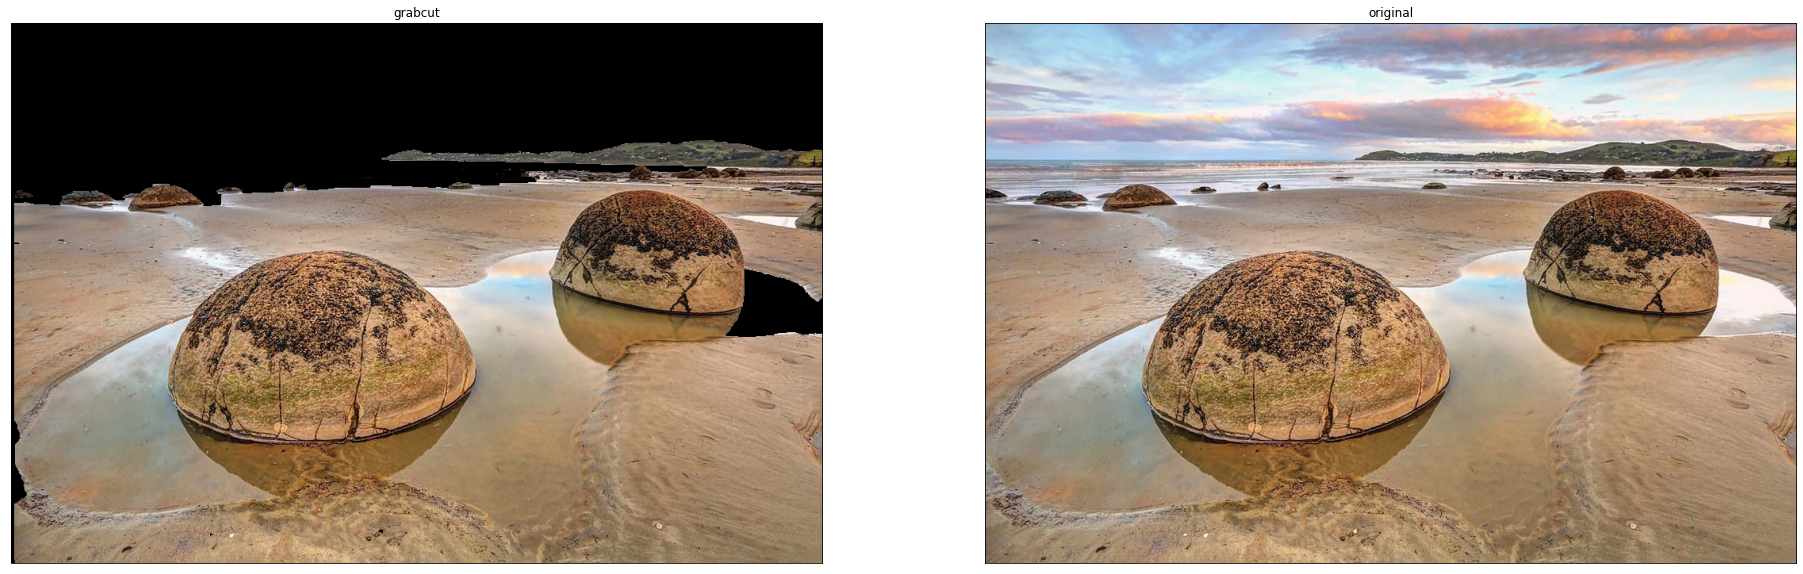

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(32,16))
plt.subplot(121),  plt.imshow(RGB_img)
plt.title("grabcut"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(RGB_src)
plt.title("original"), plt.xticks([]), plt.yticks([])

  
plt.show()

create new mask

In [ ]:
mask = np.zeros(img.shape[:2], np.uint8)
bgdModel =  np.zeros((1,65),np.float64)
fgdModel =  np.zeros((1,65),np.float64)
x = img.shape[1]
y = img.shape[0]

rectangle: Since we dont know where the foreground objects are located in any given picture, we have to give the full resolution via the parameters x and y

In [ ]:
rect = (240,240,x,y)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2  =  np.where((mask==2)|(mask==0),0,1).astype('uint8')
img  = img*mask2[:,:,np.newaxis]

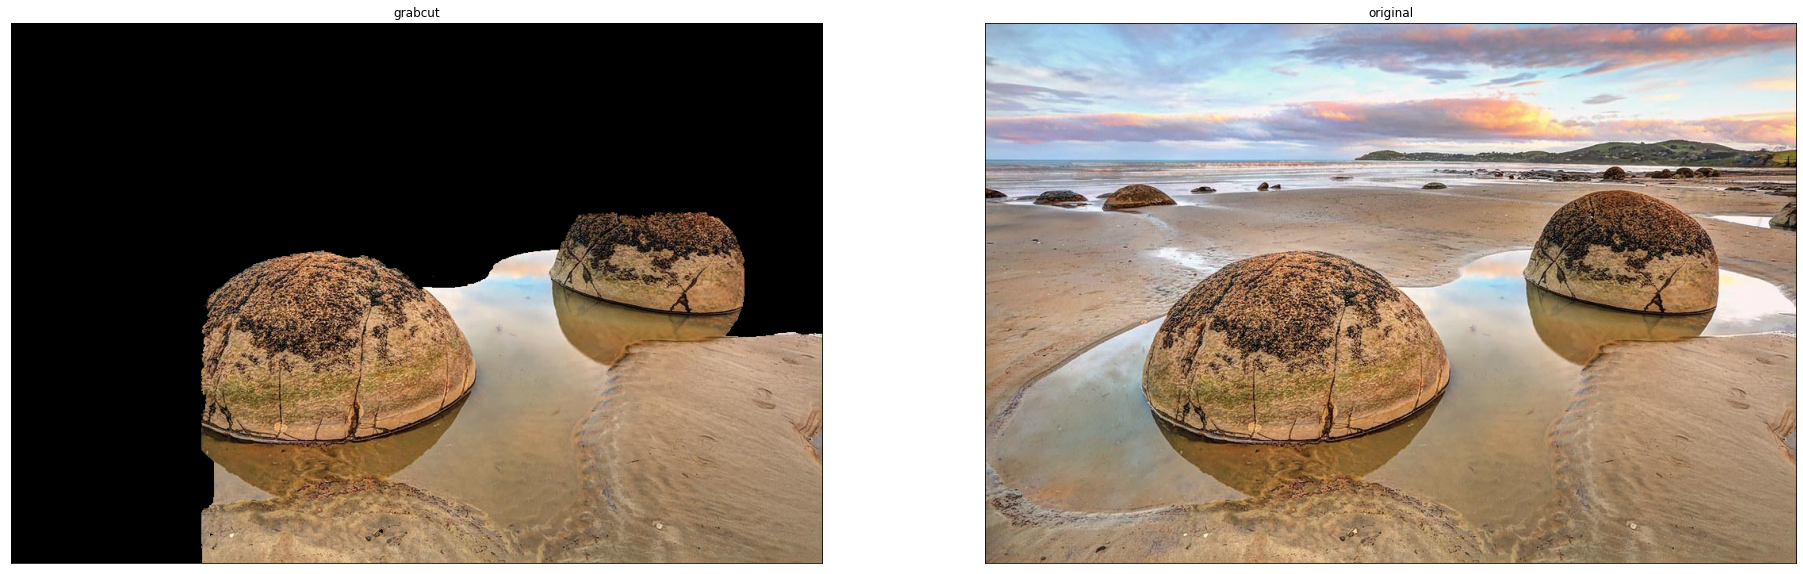

In [ ]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(32,16))
plt.subplot(121),  plt.imshow(RGB_img)
plt.title("grabcut"), plt.xticks([]), plt.yticks([])
plt.subplot(122),
plt.imshow(RGB_src)
plt.title("original"), plt.xticks([]), plt.yticks([])

  
plt.show()

# Conclusion

The Grab Cut in the Color and Tone Correction project was originally intended to automatically and precisely separate the foreground from the background so that separate color enhancement of the background and foreground could be applied. This did not work as hoped. As can be seen in Example 2, the separation of foreground and background did not run as expected for every image. Even after adjusting the mask, not only the two rocks were the foreground. Also a piece of the sand was considered as foreground, which should not be in the foreground according to the group's idea. Accordingly, the group discarded the idea of separating the foreground and background and looked for a new algorithm to automatically completely color-match an image.